In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, invgamma

In [7]:
N = 500
theta_true = 10
np.random.seed(4)
data = np.random.exponential(theta_true, N)
y_true = data.mean()
print(y_true)

10.273480125291353


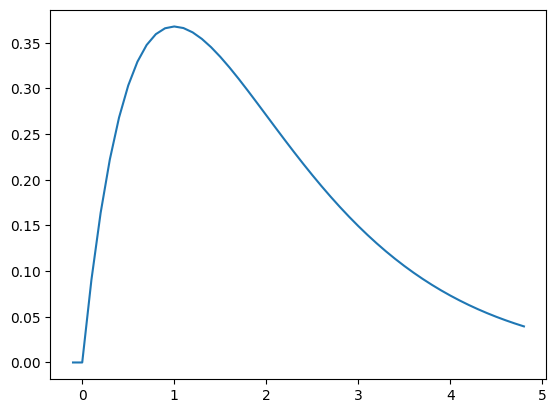

In [59]:
alpha = 2
beta = 1
# prior visualization
x = np.arange(-0.1, 4.9, .1)
p = gamma.pdf(x, a = alpha, scale = 1/beta)
plt.plot(x, p)
plt.show()

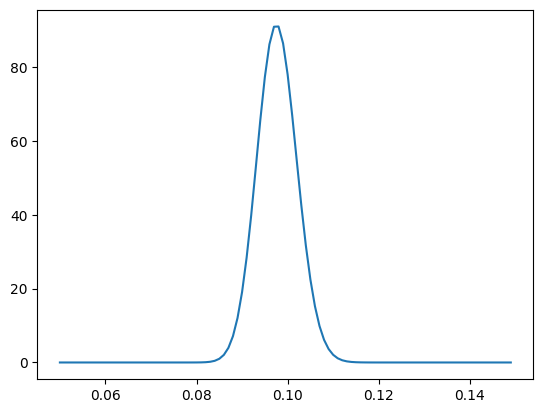

In [83]:
# true posterior visualization
x = np.arange(.05, .15, .001)
p = gamma.pdf(x, a = alpha + N, scale = 1/(beta + data.sum()))
plt.plot(x, p)
plt.show()

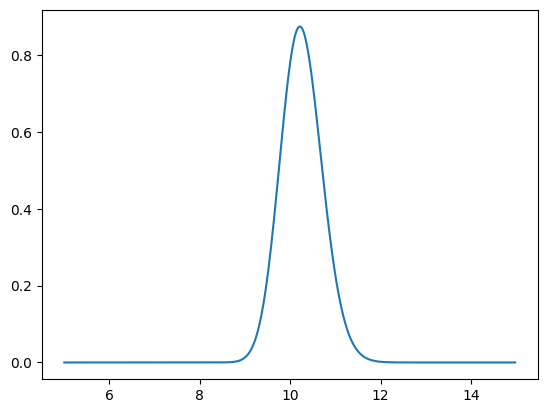

In [89]:
x = np.arange(5, 15, 0.02)
p = invgamma.pdf(x, a=alpha + N, scale = (beta + data.sum()))
plt.plot(x, p)
plt.show()

In [92]:
def sample_lambda(alpha=2, beta=1):
    # need prior probability
    return np.random.gamma(alpha, beta)

In [93]:
def rejection_sampler(T, epsilon):
    accepts = np.empty(T)
    attempts = 0
    for t in range(T):
        error = epsilon + 1
        while error >= epsilon:
            lam = sample_lambda()
            attempts += 1
            y = np.random.exponential(1/lam, N).mean()
            error = np.sqrt((y - y_true)**2)
            if error < epsilon:
                accepts[t] = lam
    accept_rate = T / attempts
    print(f"Tolerance: {epsilon}")
    print(f"Acceptance rate: {accept_rate:.6f}")
    return accepts

In [94]:
sample1 = rejection_sampler(100, 0.2)
sample2 = rejection_sampler(100, 0.1)
# sample3 = rejection_sampler(100, 0.01)

Tolerance: 0.2
Acceptance rate: 0.000348
Tolerance: 0.1
Acceptance rate: 0.000156


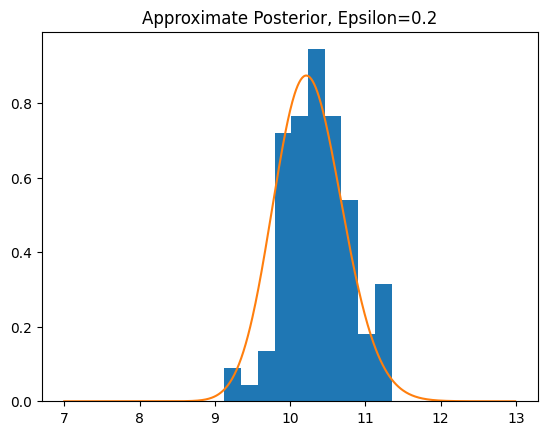

In [100]:
plt.hist(1 / sample1, bins=10, density=True)
x = np.arange(7, 13, .01)
p = invgamma.pdf(x, a = alpha + N, scale = (beta + data.sum()))
plt.plot(x, p)
plt.title("Approximate Posterior, Epsilon=0.2")
plt.show()

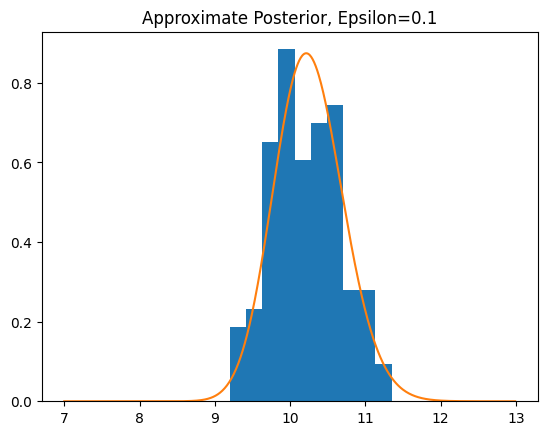

In [101]:
plt.hist(1 / sample2, bins=10, density=True)
x = np.arange(7, 13, .01)
p = invgamma.pdf(x, a = alpha + N, scale = (beta + data.sum()))
plt.plot(x, p)
plt.title("Approximate Posterior, Epsilon=0.1")
plt.show()

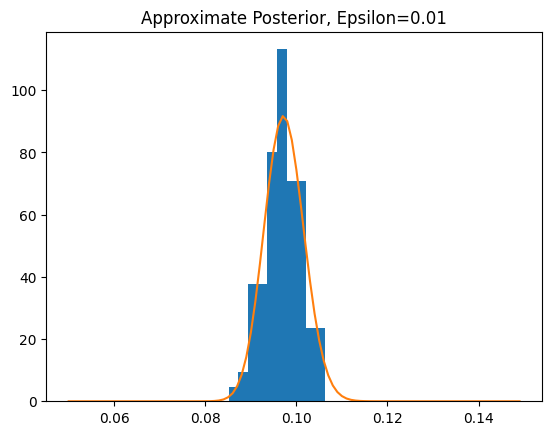

In [11]:
# plt.hist(sample3, bins=10, density=True)
# x = np.arange(0.05, 0.15, .001)
# p = gamma.pdf(x, a = alpha + N, scale = 1/(beta + data.sum()))
# plt.plot(x, p)
# plt.title("Approximate Posterior, Epsilon=0.01")
# plt.show()